In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.datasets import make_blobs
df_url = "G:/project.csv"
df = pd.read_csv(df_url)

In [10]:
datasets = make_blobs(n_samples = 100, n_features=2, centers = 8, cluster_std=1.8, random_state=101)

In [11]:
datasets[0].shape

(100, 2)

In [12]:
print("**** Claim data *****")
print(df.head())
print("\n")

**** Claim data *****
   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1




In [13]:
print("**** Claim data *****")
print(df.describe())
print("\n")

**** Claim data *****
               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  insuranceclaim  
count  1338.000000   1338.000000     1338.000000  
mean      1.515695  13270.422265        0.585202  
std       1.104885  12110.011237        0.492871  
min       0.000000   1121.873900        0.000000  
25%       1.000000   4740.287150        0.000000  
50%  

In [14]:
print(df.columns.values)

['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges' 'insuranceclaim']


In [15]:
print("**** Claim data *****")
print(df.isna().sum())
print("\n")

**** Claim data *****
age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64




In [17]:
df.fillna(df.mean(), inplace=True)

In [18]:
print(df.isna().sum)

<bound method DataFrame.sum of         age    sex    bmi  children  smoker  region  charges  insuranceclaim
0     False  False  False     False   False   False    False           False
1     False  False  False     False   False   False    False           False
2     False  False  False     False   False   False    False           False
3     False  False  False     False   False   False    False           False
4     False  False  False     False   False   False    False           False
5     False  False  False     False   False   False    False           False
6     False  False  False     False   False   False    False           False
7     False  False  False     False   False   False    False           False
8     False  False  False     False   False   False    False           False
9     False  False  False     False   False   False    False           False
10    False  False  False     False   False   False    False           False
11    False  False  False     False   False  

In [20]:
df['age'].head()

0    19
1    18
2    28
3    33
4    32
Name: age, dtype: int64

In [21]:
df[['age', 'sex']].groupby(['age'], as_index=False).mean().sort_values(by='age',ascending=False)

age       sex
46   64  0.500000
45   63  0.478261
44   62  0.478261
43   61  0.478261
42   60  0.521739
41   59  0.480000
40   58  0.480000
39   57  0.500000
38   56  0.500000
37   55  0.500000
36   54  0.500000
35   53  0.500000
34   52  0.482759
33   51  0.482759
32   50  0.517241
31   49  0.500000
30   48  0.482759
29   47  0.482759
28   46  0.517241
27   45  0.517241
26   44  0.481481
25   43  0.481481
24   42  0.518519
23   41  0.518519
22   40  0.518519
21   39  0.480000
20   38  0.480000
19   37  0.520000
18   36  0.520000
17   35  0.520000
16   34  0.500000
15   33  0.500000
14   32  0.500000
13   31  0.518519
12   30  0.518519
11   29  0.518519
10   28  0.500000
9    27  0.500000
8    26  0.535714
7    25  0.535714
6    24  0.500000
5    23  0.500000
4    22  0.535714
3    21  0.535714
2    20  0.517241
1    19  0.514706
0    18  0.521739

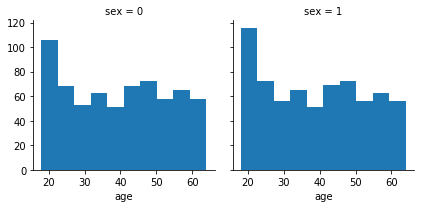

In [22]:
g = sns.FacetGrid(df, col='sex')
g.map(plt.hist, 'age', bins=10)